In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib

In [2]:
model = joblib.load('/content/drive/MyDrive/취업 프로젝트/관악구 부동산 예측 프로젝트/final_random_forest_model.pkl')

In [8]:
model

RandomForestRegressor(random_state=42)

In [3]:
# 미래 데이터 생성 (다양한 시나리오 기반)
np.random.seed(42)
scenario_1_data = pd.DataFrame({
    '건물면적(㎡)': np.random.uniform(50, 150, 10),  # 50 ~ 150 평방미터 사이 랜덤 면적
    '토지면적(㎡)': np.random.uniform(30, 100, 10),  # 30 ~ 100 평방미터 사이 랜덤 토지 면적
    '건축년도': np.random.randint(2000, 2025, 10),  # 2000년부터 2025년 사이 랜덤 건축년도
    '연도': np.arange(2025, 2035),  # 2025년부터 2034년까지
    '분기': np.random.randint(1, 5, 10),  # 1~4 분기 랜덤 생성
    '요일': np.random.randint(0, 7, 10),  # 요일 정보 (0: 월요일 ~ 6: 일요일)
    '월': np.random.randint(1, 13, 10),  # 월 정보 (1~12월)
    '건물면적(평)': np.random.uniform(15, 45, 10),  # 15 ~ 45 평으로 랜덤 변환
    '층': np.random.randint(1, 30, 10),  # 1~30층 랜덤 지정
    '평당 가격(만원)': np.random.uniform(1000, 4000, 10),  # 평당 가격 랜덤 지정
    '건물용도_아파트': [1]*10,  # 아파트로 설정
    '건물용도_연립다세대': [0]*10,
    '건물용도_오피스텔': [0]*10,
    '법정동명_남현동': [0]*10,
    '법정동명_봉천동': [1]*10,  # 봉천동으로 설정
    '법정동명_상도동': [0]*10,
    '법정동명_신림동': [0]*10,
    '지번구분명_대지': [1]*10,
    '지번구분명_블럭': [0]*10,
    '지번구분명_산': [0]*10
})

scenario_2_data = pd.DataFrame({
    '건물면적(㎡)': np.random.uniform(100, 200, 10),  # 100 ~ 200 평방미터 사이 랜덤 면적 (고급형 시나리오)
    '토지면적(㎡)': np.random.uniform(50, 150, 10),  # 50 ~ 150 평방미터 사이 랜덤 토지 면적
    '건축년도': np.random.randint(2000, 2025, 10),  # 2000년부터 2025년 사이 랜덤 건축년도
    '연도': np.arange(2025, 2035),  # 2025년부터 2034년까지
    '분기': np.random.randint(1, 5, 10),  # 1~4 분기 랜덤 생성
    '요일': np.random.randint(0, 7, 10),  # 요일 정보 (0: 월요일 ~ 6: 일요일)
    '월': np.random.randint(1, 13, 10),  # 월 정보 (1~12월)
    '건물면적(평)': np.random.uniform(30, 60, 10),  # 30 ~ 60 평으로 랜덤 변환
    '층': np.random.randint(1, 30, 10),  # 1~30층 랜덤 지정
    '평당 가격(만원)': np.random.uniform(1500, 5000, 10),  # 평당 가격 랜덤 지정
    '건물용도_아파트': [0]*10,
    '건물용도_연립다세대': [1]*10,  # 연립다세대로 설정
    '건물용도_오피스텔': [0]*10,
    '법정동명_남현동': [1]*10,  # 남현동으로 설정
    '법정동명_봉천동': [0]*10,
    '법정동명_상도동': [0]*10,
    '법정동명_신림동': [0]*10,
    '지번구분명_대지': [0]*10,
    '지번구분명_블럭': [1]*10,
    '지번구분명_산': [0]*10
})

scenario_3_data = pd.DataFrame({
    '건물면적(㎡)': np.random.uniform(30, 85, 10),  # 30 ~ 85 평방미터 사이 랜덤 면적 (저가형 시나리오)
    '토지면적(㎡)': np.random.uniform(20, 80, 10),  # 20 ~ 80 평방미터 사이 랜덤 토지 면적
    '건축년도': np.random.randint(2000, 2025, 10),  # 2000년부터 2025년 사이 랜덤 건축년도
    '연도': np.arange(2025, 2035),  # 2025년부터 2034년까지
    '분기': np.random.randint(1, 5, 10),  # 1~4 분기 랜덤 생성
    '요일': np.random.randint(0, 7, 10),  # 요일 정보 (0: 월요일 ~ 6: 일요일)
    '월': np.random.randint(1, 13, 10),  # 월 정보 (1~12월)
    '건물면적(평)': np.random.uniform(10, 25, 10),  # 10 ~ 25 평으로 랜덤 변환
    '층': np.random.randint(1, 30, 10),  # 1~30층 랜덤 지정
    '평당 가격(만원)': np.random.uniform(800, 3000, 10),  # 평당 가격 랜덤 지정
    '건물용도_아파트': [0]*10,
    '건물용도_연립다세대': [0]*10,
    '건물용도_오피스텔': [1]*10,  # 오피스텔로 설정
    '법정동명_남현동': [0]*10,
    '법정동명_봉천동': [0]*10,
    '법정동명_상도동': [0]*10,
    '법정동명_신림동': [1]*10, # 상도동으로 설정
    '지번구분명_대지': [1]*10, # 대지로 설정
    '지번구분명_블럭': [0]*10,
    '지번구분명_산': [0]*10
})

<ipython-input-5-9d9710b9c28f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicted_Price'] = predicted_prices
<ipython-input-5-9d9710b9c28f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price_Increase_Rate'] = data['Predicted_Price'].pct_change() * 100
<ipython-input-5-9d9710b9c28f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html


Scenario 1 Results:
      연도  Predicted_Price  Price_Increase_Rate
1  2026         61606.00             1.051423
2  2027         61606.00             0.000000
3  2028         58006.00            -5.843587
4  2029         61924.50             6.755336
5  2030         61912.00            -0.020186
6  2031         53874.00           -12.982944
7  2032         37257.00           -30.844192
8  2033         60437.93            62.218992
9  2034         60231.15            -0.342136


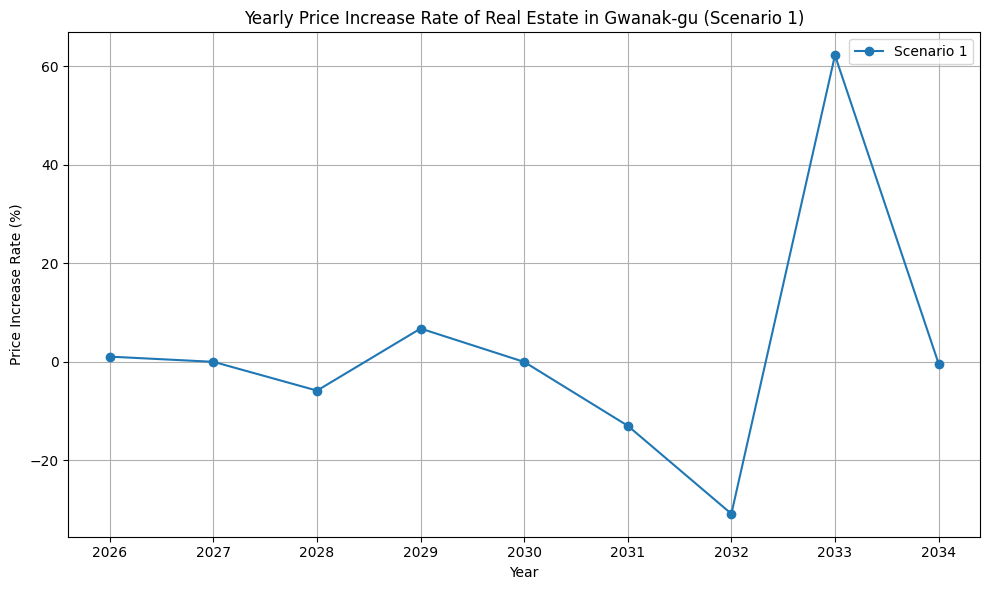

<ipython-input-5-9d9710b9c28f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicted_Price'] = predicted_prices
<ipython-input-5-9d9710b9c28f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price_Increase_Rate'] = data['Predicted_Price'].pct_change() * 100
<ipython-input-5-9d9710b9c28f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html


Scenario 2 Results:
      연도  Predicted_Price  Price_Increase_Rate
1  2026         61626.00             0.003245
2  2027         61624.00            -0.003245
3  2028         60521.00            -1.789887
4  2029         60445.32            -0.125048
5  2030         60784.00             0.560308
6  2031         61616.00             1.368781
7  2032         61624.00             0.012984
8  2033         60998.98            -1.014248
9  2034         61435.00             0.714799


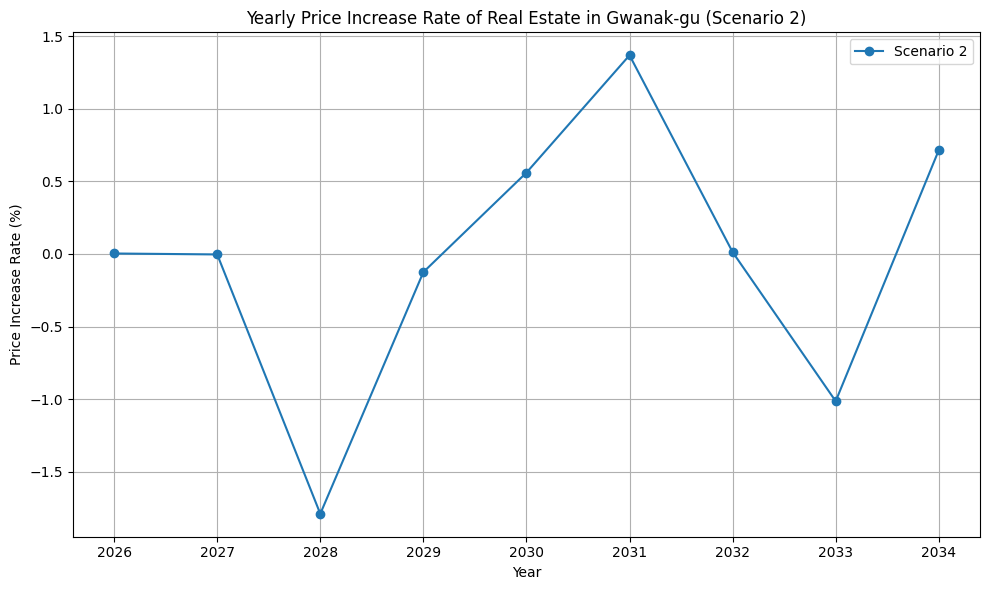

<ipython-input-5-9d9710b9c28f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Predicted_Price'] = predicted_prices
<ipython-input-5-9d9710b9c28f>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Price_Increase_Rate'] = data['Predicted_Price'].pct_change() * 100
<ipython-input-5-9d9710b9c28f>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html


Scenario 3 Results:
      연도  Predicted_Price  Price_Increase_Rate
1  2026          39042.5           -35.035816
2  2027          38420.8            -1.592367
3  2028          53339.0            38.828447
4  2029          59502.5            11.555335
5  2030          46092.0           -22.537708
6  2031          40681.0           -11.739564
7  2032          28024.0           -31.112805
8  2033          18508.0           -33.956609
9  2034          59807.5           223.144046


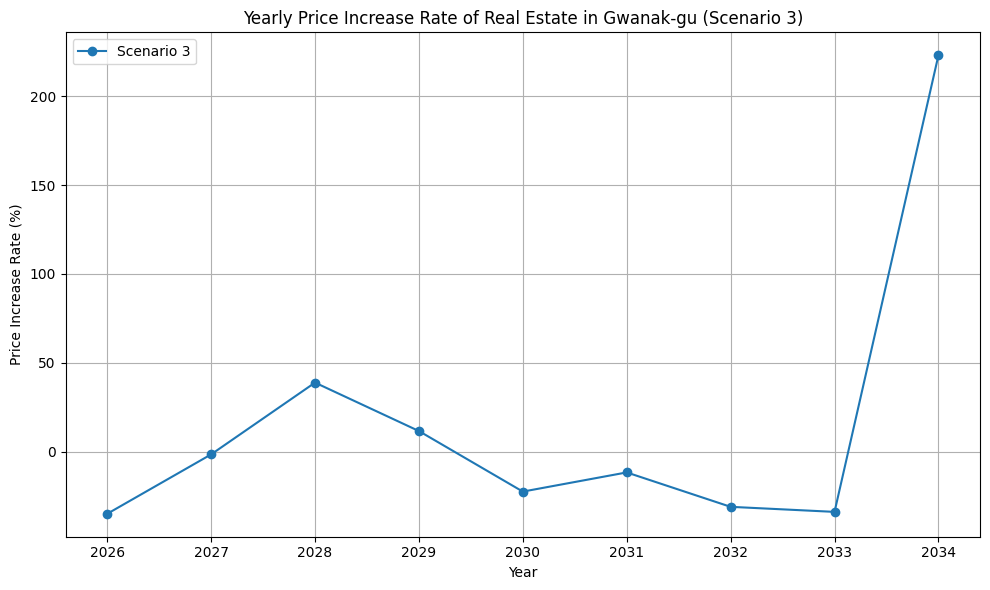

In [5]:
# Get the feature names from the trained model
trained_features = model.feature_names_in_
scenarios = {'Scenario 1': scenario_1_data, 'Scenario 2': scenario_2_data, 'Scenario 3': scenario_3_data}

# Reorder columns in scenario dataframes
for name, data in scenarios.items():
    # Ensure all required columns are present
    missing_cols = set(trained_features) - set(data.columns)
    for col in missing_cols:
        data[col] = 0  # Add missing columns with default value 0

    # Reorder columns to match training data
    data = data[trained_features]

    predicted_prices = model.predict(data)
    data['Predicted_Price'] = predicted_prices
    data['Price_Increase_Rate'] = data['Predicted_Price'].pct_change() * 100
    data.dropna(inplace=True)  # NaN 값 제거 (첫 해는 비교 대상이 없으므로 상승률 NaN)

    # 결과 출력
    print(f"\n{name} Results:\n", data[['연도', 'Predicted_Price', 'Price_Increase_Rate']])

    # 연도별 가격 상승률 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(data['연도'], data['Price_Increase_Rate'], marker='o', linestyle='-', label=name)
    plt.xlabel('Year')
    plt.ylabel('Price Increase Rate (%)')
    plt.title(f'Yearly Price Increase Rate of Real Estate in Gwanak-gu ({name})')
    plt.grid(True)
    plt.xticks(data['연도'])
    plt.legend()
    plt.tight_layout()
    plt.show()